## Importing Important packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.utils import plot_model
from keras.models import load_model

import os #for reading files

Activating the GPU for fast Training

In [2]:
physical_device = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_device[0],True)

## Data Loading and Prepare it to feed in model

In [3]:
data = pd.read_csv('driving_log_hardTrack.csv',names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [4]:
data.shape

(3146, 7)

In [5]:
data

center  \
0     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
1     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
2     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
4     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
...                                                 ...   
3141  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3142  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3143  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3144  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3145  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   

                                                   left  \
0     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
1     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
2     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
4     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
...                                                 ...   
3141  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3142  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3143  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3144  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   
3145  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...   

                                                  right  steering  throttle  \
0     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
1     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
2     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
3     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
4     C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
...                                                 ...       ...       ...   
3141  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
3142  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
3143  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
3144  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   
3145  C:\Users\suraj\Desktop\MinorProjectNITP2022\IM...       0.0       0.0   

      reverse      speed  
0         0.0   0.000133  
1         0.0   0.000202  
2         0.0   0.000045  
3         0.0   0.000030  
4         0.0   0.000031  
...       ...        ...  
3141      0.0  24.124530  
3142      0.0  23.930570  
3143      0.0  23.786120  
3144      0.0  23.594880  
3145      0.0  23.439060  

[3146 rows x 7 columns]

In [6]:
X = data[['center', 'left', 'right']].values

In [7]:
X

array([['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_25_19_49_20_562.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_25_19_49_20_562.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_25_19_49_20_562.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_25_19_49_20_633.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_25_19_49_20_633.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_25_19_49_20_633.jpg'],
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_25_19_49_20_706.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\left_2022_11_25_19_49_20_706.jpg',
        'C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\right_2022_11_25_19_49_20_706.jpg'],
       ...,
       ['C:\\Users\\suraj\\Desktop\\MinorProjectNITP2022\\IMG\\center_2022_11_25_19_56_28_118.

In [8]:
y = data['steering'].values

In [9]:
def Preprocess(image):
    
    image = mpimg.imread(image) #Load RGB images from a file
    image = image/255 # normalize pixels value between 0 & 1
    return image

In [10]:
def batch_generator(X_train, y_train, batch_size):
    """
    Generate training image and associated steering angles
    """
    images = list()
    steers = list()

    while 1:
        batch_count = 0
        for index in range(X_train.shape[0]):
        
            center, left, right = X_train[index]
            steering_angle = y_train[index]
            
            # image preprocess
            center_image = Preprocess(center)
            left_image = Preprocess(left)
            right_image = Preprocess(right)
                
            #add the image and steering angle to the batch
            images.append(center_image)
            images.append(left_image)
            images.append(right_image)
            
            steers.append(steering_angle)
            steers.append(steering_angle-0.001)
            steers.append(steering_angle+0.001)
            
            batch_count = batch_count + 1
            
            if batch_count == batch_size:
                batch_count = 0
                yield (np.array(images),np.array(steers))
                images = list() 
                steers = list()
            

In [19]:
%%time

model = load_model('model_v1.h5')
    
batch_size = 10
steps = X.shape[0]//batch_size

#Fits the model on data generated batch-by-batch by a Python generator.
generator = batch_generator(X, y, batch_size=10)

model_history = model.fit(
                            generator,
                            epochs = 20,
                            steps_per_epoch=steps,
                         )

Epoch 1/20
314/314 [==============================] - 41s 130ms/step - loss: 0.1955 - accuracy: 0.1999
Epoch 2/20
314/314 [==============================] - 39s 124ms/step - loss: 0.1759 - accuracy: 0.2017
Epoch 3/20
314/314 [==============================] - 42s 134ms/step - loss: 0.1751 - accuracy: 0.2017
Epoch 4/20
314/314 [==============================] - 36s 115ms/step - loss: 0.1748 - accuracy: 0.2017
Epoch 5/20
314/314 [==============================] - 42s 133ms/step - loss: 0.1745 - accuracy: 0.2017
Epoch 6/20
314/314 [==============================] - 36s 115ms/step - loss: 0.1745 - accuracy: 0.2017
Epoch 7/20
314/314 [==============================] - 38s 120ms/step - loss: 0.1771 - accuracy: 0.2015
Epoch 8/20
314/314 [==============================] - 36s 113ms/step - loss: 0.1738 - accuracy: 0.2017
Epoch 9/20
314/314 [==============================] - 35s 111ms/step - loss: 0.1741 - accuracy: 0.2017
Epoch 10/20
314/314 [==============================] - 35s 112ms/step - l

In [20]:
model.save('model_v1_2.h5')

In [21]:
model_history.history.keys()

dict_keys(['loss', 'accuracy'])

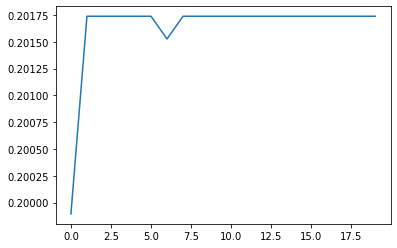

In [22]:
plt.plot(model_history.history['accuracy'])

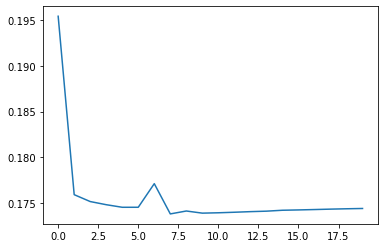

In [23]:
plt.plot(model_history.history['loss'])